In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.regularizers import L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
df = pd.read_csv("A_Z Handwritten Data.csv")

In [4]:
x = df.drop('0', axis = 'columns')

In [5]:
y = df['0']

In [6]:
x

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [7]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [8]:
sum(y.value_counts())

372450

In [28]:
y.value_counts().index

Int64Index([14, 18, 20,  2, 19, 15, 13,  0, 12, 11, 17,  4, 24, 22,  3,  1,  9,
             7, 23, 25, 16,  6, 10, 21,  5,  8],
           dtype='int64')

<BarContainer object of 26 artists>

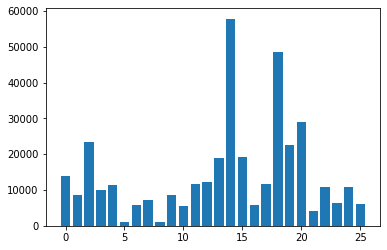

In [9]:
plt.bar(y.value_counts().index, y.value_counts())

In [10]:
y.value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: 0, dtype: int64

In [8]:
x = x.to_numpy()

In [9]:
x = x/255.

In [10]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
y = y.to_numpy()

In [12]:
y.shape

(372450,)

In [25]:
y

array([ 0,  0,  0, ..., 25, 25, 25])

In [3]:
np.save('x', x)
np.save('y', y)

NameError: name 'x' is not defined

In [4]:
x = np.load('x.npy')
y = np.load('y.npy')

In [4]:
y1 = np.zeros((372450, 26))

In [5]:
for i in range(372450):
    o = y[i]
    y1[i][o] = 1
    if i%1000 == 0:
        print("Rows added =", i)

Rows added = 0
Rows added = 1000
Rows added = 2000
Rows added = 3000
Rows added = 4000
Rows added = 5000
Rows added = 6000
Rows added = 7000
Rows added = 8000
Rows added = 9000
Rows added = 10000
Rows added = 11000
Rows added = 12000
Rows added = 13000
Rows added = 14000
Rows added = 15000
Rows added = 16000
Rows added = 17000
Rows added = 18000
Rows added = 19000
Rows added = 20000
Rows added = 21000
Rows added = 22000
Rows added = 23000
Rows added = 24000
Rows added = 25000
Rows added = 26000
Rows added = 27000
Rows added = 28000
Rows added = 29000
Rows added = 30000
Rows added = 31000
Rows added = 32000
Rows added = 33000
Rows added = 34000
Rows added = 35000
Rows added = 36000
Rows added = 37000
Rows added = 38000
Rows added = 39000
Rows added = 40000
Rows added = 41000
Rows added = 42000
Rows added = 43000
Rows added = 44000
Rows added = 45000
Rows added = 46000
Rows added = 47000
Rows added = 48000
Rows added = 49000
Rows added = 50000
Rows added = 51000
Rows added = 52000
Rows a

In [27]:
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 10)

In [39]:
# np.save('x_test',x_test)
np.save('y_test',y_test1)
# np.save('x_train',x)
# np.save('y_train',y_train)

In [3]:
x = np.load('x_train.npy')
y = np.load('y_train.npy')

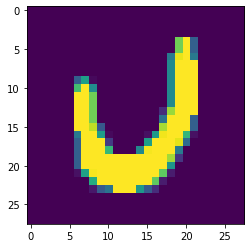

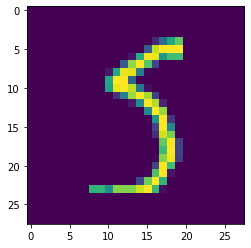

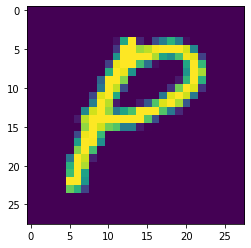

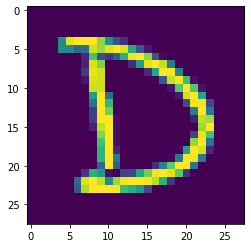

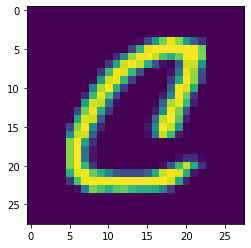

In [54]:
for i in range(5):
    plt.imshow(x_train[i])
    plt.show()

In [10]:
x_test = np.load('x_test.npy')
x_cv = np.load('x_cv.npy')


In [11]:
x_test = x_test.reshape((-1,28, 28, 1))
x_cv = x_cv.reshape((-1, 28, 28, 1))

In [7]:
x = x.reshape((-1,28, 28, 1))

In [6]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.1, random_state = 10)

In [41]:
# np.save('x_cv',x_cv)
# np.save('y_cv',y_val)
# np.save('x_train',x_train)
np.save('y_train',y_tr)

In [3]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_cv = np.load('x_cv.npy')
y_cv = np.load('y_cv.npy')

In [9]:
y_cv.shape

(33521,)

In [10]:
y_val = np.zeros((33521, 26))
for i in range(33521):
    o = y_cv[i]
    y_val[i][o] = 1
    if i%1000 == 0:
        print("Rows added =", i)

Rows added = 0
Rows added = 1000
Rows added = 2000
Rows added = 3000
Rows added = 4000
Rows added = 5000
Rows added = 6000
Rows added = 7000
Rows added = 8000
Rows added = 9000
Rows added = 10000
Rows added = 11000
Rows added = 12000
Rows added = 13000
Rows added = 14000
Rows added = 15000
Rows added = 16000
Rows added = 17000
Rows added = 18000
Rows added = 19000
Rows added = 20000
Rows added = 21000
Rows added = 22000
Rows added = 23000
Rows added = 24000
Rows added = 25000
Rows added = 26000
Rows added = 27000
Rows added = 28000
Rows added = 29000
Rows added = 30000
Rows added = 31000
Rows added = 32000
Rows added = 33000


In [14]:
y_train.shape

(301684,)

In [15]:
y_tr = np.zeros((301684, 26))
for i in range(301684):
    o = y_train[i]
    y_tr[i][o] = 1
    if i%1000 == 0:
        print("Rows added =", i)

Rows added = 0
Rows added = 1000
Rows added = 2000
Rows added = 3000
Rows added = 4000
Rows added = 5000
Rows added = 6000
Rows added = 7000
Rows added = 8000
Rows added = 9000
Rows added = 10000
Rows added = 11000
Rows added = 12000
Rows added = 13000
Rows added = 14000
Rows added = 15000
Rows added = 16000
Rows added = 17000
Rows added = 18000
Rows added = 19000
Rows added = 20000
Rows added = 21000
Rows added = 22000
Rows added = 23000
Rows added = 24000
Rows added = 25000
Rows added = 26000
Rows added = 27000
Rows added = 28000
Rows added = 29000
Rows added = 30000
Rows added = 31000
Rows added = 32000
Rows added = 33000
Rows added = 34000
Rows added = 35000
Rows added = 36000
Rows added = 37000
Rows added = 38000
Rows added = 39000
Rows added = 40000
Rows added = 41000
Rows added = 42000
Rows added = 43000
Rows added = 44000
Rows added = 45000
Rows added = 46000
Rows added = 47000
Rows added = 48000
Rows added = 49000
Rows added = 50000
Rows added = 51000
Rows added = 52000
Rows a

In [40]:
y_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Model

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    MaxPool2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    MaxPool2D((2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(26, activation = 'softmax')
])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [5]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [6]:
cb = tf.keras.callbacks.ModelCheckpoint(filepath = 'model.ckpt', save_weights_only = True, verbose = 1)

In [19]:
tf.config.run_functions_eagerly(True)

In [20]:
model.fit(x_train, y_tr, epochs = 10, callbacks = [cb], validation_data = (x_cv, y_val))

/usr/local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
9428/9428 [==============================] - 165s 17ms/step - loss: 0.1126 - accuracy: 0.9687 - val_loss: 0.0726 - val_accuracy: 0.9803

Epoch 00001: saving model to model.ckpt
Epoch 2/10
9428/9428 [==============================] - 164s 17ms/step - loss: 0.0521 - accuracy: 0.9853 - val_loss: 0.0615 - val_accuracy: 0.9833

Epoch 00002: saving model to model.ckpt
Epoch 3/10
9428/9428 [==============================] - 164s 17ms/step - loss: 0.0373 - accuracy: 0.9892 - val_loss: 0.0428 - val_accuracy: 0.9891

Epoch 00003: saving model to model.ckpt
Epoch 4/10
9428/9428 [==============================] - 165s 17ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0406 - val_accuracy: 0.9894

Epoch 00004: saving model to model.ckpt
Epoch 5/10
9428/9428 [==============================] - 164s 17ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0429 - val_accuracy: 0.9896

Epoch 00005: saving model to model.ckpt
Epoch 6/10
9428/9428 [==============================] - 164s

KeyboardInterrupt: 

In [53]:
model.save('model.h5')

In [23]:
pred = model.predict(x_cv)

/usr/local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [26]:
pred

array([[9.9846020e-26, 2.2999086e-20, 8.0772267e-10, ..., 4.2279843e-13,
        1.8443138e-16, 8.1974962e-17],
       [8.3276256e-16, 3.2234144e-13, 4.7761222e-07, ..., 6.6376190e-22,
        1.5133905e-14, 3.1135753e-16],
       [9.7947242e-23, 4.7089909e-19, 6.8325837e-29, ..., 1.6176989e-17,
        2.3950712e-21, 1.8188702e-31],
       ...,
       [6.8885114e-23, 2.6773717e-17, 1.4219898e-25, ..., 3.5301868e-26,
        1.6909245e-24, 1.2188349e-22],
       [1.6335191e-16, 2.7598330e-15, 5.0470773e-12, ..., 4.1052243e-24,
        2.8749449e-22, 2.9548312e-23],
       [1.5546499e-29, 5.1150383e-19, 4.7002363e-27, ..., 3.0785730e-22,
        7.5164074e-18, 2.4061621e-22]], dtype=float32)

In [28]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
cm = confusion_matrix(np.argmax(y_val, axis = -1), np.argmax(pred, axis = -1))

In [31]:
cm_dis = ConfusionMatrixDisplay(cm)

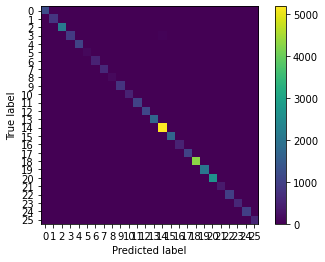

In [34]:
cm_dis.plot(include_values = False)
plt.show()

In [35]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [37]:
y_test.shape

(37245,)

In [38]:
y_test1 = np.zeros((37245, 26))
for i in range(37245):
    o = y_test[i]
    y_test1[i][o] = 1
    if i%1000 == 0:
        print("Rows added =", i)

Rows added = 0
Rows added = 1000
Rows added = 2000
Rows added = 3000
Rows added = 4000
Rows added = 5000
Rows added = 6000
Rows added = 7000
Rows added = 8000
Rows added = 9000
Rows added = 10000
Rows added = 11000
Rows added = 12000
Rows added = 13000
Rows added = 14000
Rows added = 15000
Rows added = 16000
Rows added = 17000
Rows added = 18000
Rows added = 19000
Rows added = 20000
Rows added = 21000
Rows added = 22000
Rows added = 23000
Rows added = 24000
Rows added = 25000
Rows added = 26000
Rows added = 27000
Rows added = 28000
Rows added = 29000
Rows added = 30000
Rows added = 31000
Rows added = 32000
Rows added = 33000
Rows added = 34000
Rows added = 35000
Rows added = 36000
Rows added = 37000


In [43]:
y_test = np.load('y_test.npy')

In [45]:
test_pred = model.predict(x_test)

/usr/local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [46]:
np.argmax(test_pred, axis = -1)

array([18, 13,  6, ..., 15, 24,  2])

In [47]:
cm_test = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(test_pred, axis = -1))

In [49]:
cm_test_dis = ConfusionMatrixDisplay(cm_test)

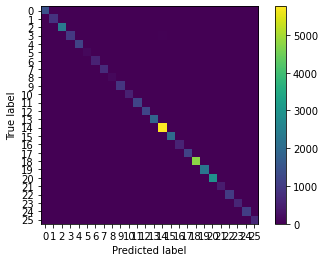

In [50]:
cm_test_dis.plot(include_values = False)

In [51]:
model.evaluate(x_cv, y_val)

   7/1048 [..............................] - ETA: 8s - loss: 0.0025 - accuracy: 1.0000 

/usr/local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1048/1048 [==============================] - 9s 9ms/step - loss: 0.0390 - accuracy: 0.9914


[0.03900182992219925, 0.9914083480834961]

In [52]:
model.evaluate(x_test, y_test)

1164/1164 [==============================] - 10s 9ms/step - loss: 0.0339 - accuracy: 0.9916


[0.0338703915476799, 0.991649866104126]